<a href="https://colab.research.google.com/github/Wertymuna/Histogram-Equalization/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ig.png to ig.png
User uploaded file "ig.png" with length 97288 bytes


(<Axes: title={'center': 'Citra RGB'}>,
 Text(0.5, 1.0, 'Citra RGB'))

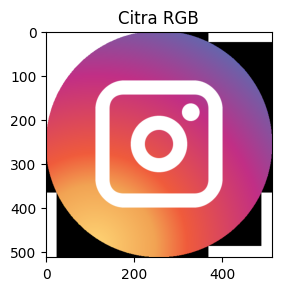

In [3]:
from google.colab import files
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display, Math, Latex

from PIL import Image


# upload file
upload = files.upload()

# mengulang file yang di upload
for fn in upload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(upload[fn])))

# Simpan path file
file_path = '/content/' + list(upload.keys())[0]  # Asumsikan hanya mengunggah satu file

# Baca gambar
img_path = '/content/' + list(upload.keys())[0]
img_rgb = cv2.imread(img_path)

#tampilakan gambar yang sudah di upload
plt.subplot(1,2,1),plt.imshow(img_rgb[:,:,::-1]),plt.title('Citra RGB')

(array([8.35640e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.50000e+01, 1.00200e+04,
        1.66070e+04, 1.80270e+04, 2.24040e+04, 2.26690e+04, 2.25330e+04,
        2.24090e+04, 2.05150e+04, 2.02090e+04, 1.46900e+04, 1.23750e+04,
        1.18440e+04, 9.90100e+03, 9.54500e+03, 9.52600e+03, 9.19500e+03,
        9.11500e+03, 1.18470e+04, 1.30050e+04, 1.24650e+04, 1.32310e+04,
        1.62190e+04, 1.12850e+04, 1.18130e+04, 8.69200e+03, 6.53100e+03,
        6.66100e+03, 5.80600e+03, 5.24200e+03, 8.70700e+03, 9.17100e+03,
        1.09160e+04, 6.83700e+03, 7.75800e+03, 8.02800e+03, 7.53600e+03,
        6.64200e+03, 6.46100e+03, 3.01910e+04, 1.01880e+04, 2.06037e+05]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

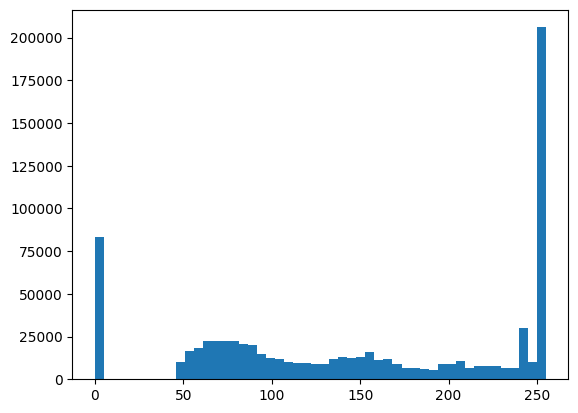

In [4]:

# convert gambar ke numpy array
img = np.asarray(img_rgb)

# letakkan piksel dalam larik 1D dengan meratakan larik img
flat = img.flatten()

# lihat histogram dari gambar
plt.hist(flat, bins=50)

In [5]:
# rumus untuk membuat histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

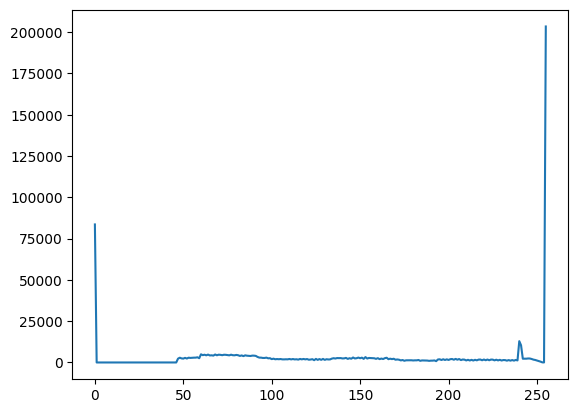

In [6]:

# buat fungsi histogram kita sendiri
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop loop melalui piksel dan menjumlahkan jumlah piksel
    for pixel in image:
        histogram[pixel] += 1

    # return hasil akhir kita
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

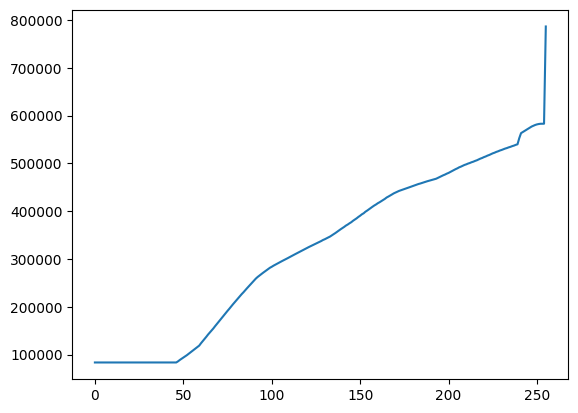

In [7]:
# buat fungsi jumlah kumulatif kami
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# jalankan fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [8]:
# rumus untuk menghitung jumlah akumulasi
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

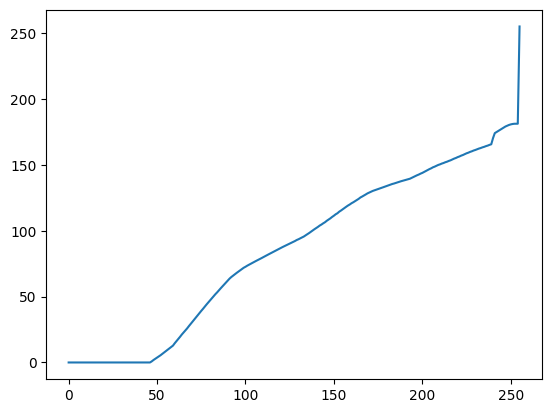

In [9]:
# menormalkan kembali nilai cumsum menjadi antara 0-255

# pembilang & penyebut
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

#normalkan kembali cdf
cs = nj / N

plt.plot(cs)

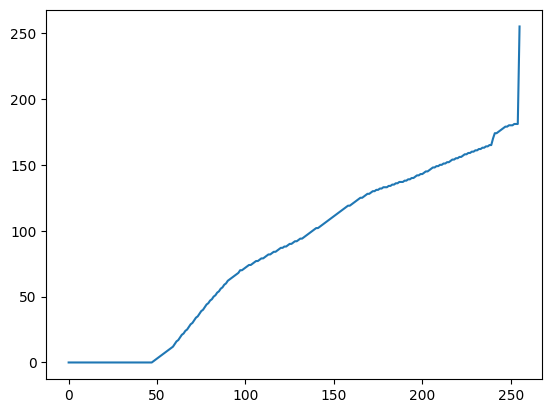

In [10]:
# kembalikan ke uint8 karena kita tidak dapat menggunakan nilai floating point dalam gambar
cs = cs.astype('uint8')

plt.plot(cs)

(array([ 98790.,  14351.,  10659.,  13461.,  17534.,  13891.,  13711.,
         13442.,  13451.,  12921.,  16552.,  12094.,  17340.,  13510.,
         12411.,  13664.,  13551.,  14715.,  13305.,  12950.,  17737.,
         13482.,  13240.,  14360.,  13906.,  13856.,  14817.,  12966.,
         13028.,  15507.,  15892.,  13574.,   5348.,  12910.,  22102.,
          7991.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        203413.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

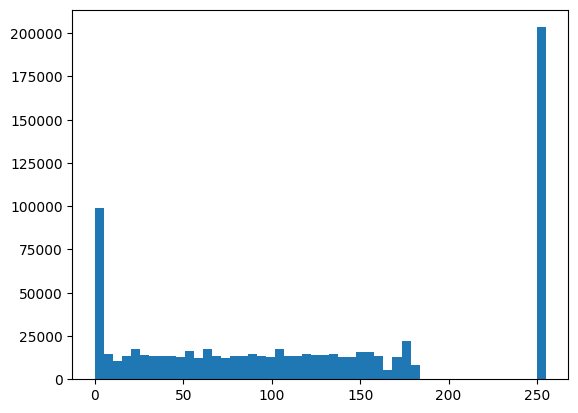

In [11]:
# dapatkan nilai dari jumlah kumulatif untuk setiap indeks secara flat, dan atur sebagai img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
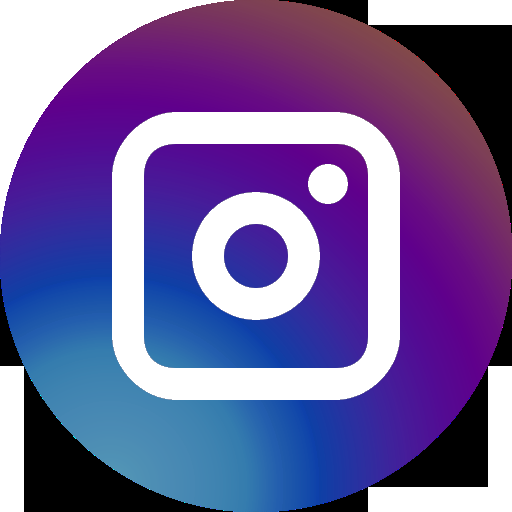

In [12]:
# mengembalikan array ke bentuk aslinya karena kita meratakannya
img_new = np.reshape(img_new, img.shape)
img_new

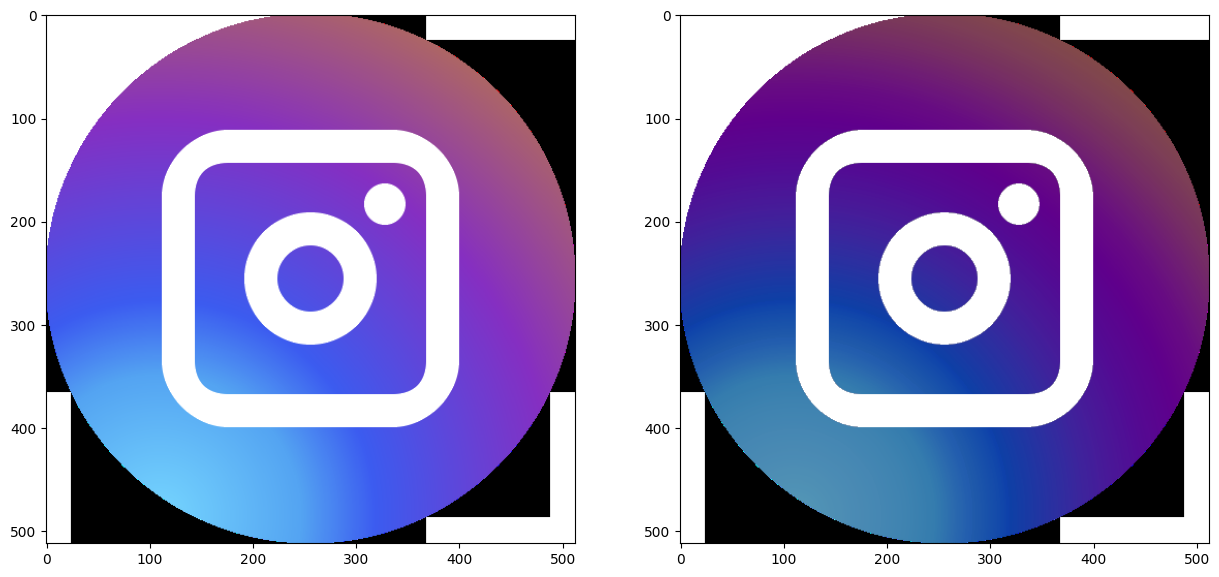

In [13]:
# mengatur tampilan gambar berdampingan
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# menampilkan gambar baru
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)
